# Importing libraries

In [24]:
# Helper libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# Visualization libraries
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

# Model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Evaluation libraries
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Exploring Data

In [25]:
# Load the dataset
data = pd.read_csv("house_price_dataset.csv")
display(data.head())

,ID,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
0,1,5,629,2022,702,1,0,3,627,457528
1,2,2,2402,1972,251,1,1,3,705,78691
2,3,7,1547,1968,1224,3,0,1,282,316056
3,4,1,666,1937,2890,4,1,3,39,213285
4,5,9,2946,1985,768,2,1,4,848,304717


In [26]:
# Number of rows and column in data
data.shape

(1000, 10)

In [27]:
# Drop the ID column, since it is not a feature
data.drop(columns=['ID'], inplace=True)

In [28]:
# Data Description
display(data.describe())

,OverallQual,GrLivArea,YearBuilt,TotalBsmtSF,FullBath,HalfBath,GarageCars,GarageArea,SalePrice
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.61700,1996.309000,1960.760000,1740.401000,2.506000,0.994000,2.038000,484.786000,270963.885000
std,2.92076,883.054538,35.169351,1007.061464,1.135453,0.809085,1.406604,282.732658,129264.336981
min,1.00000,500.000000,1900.000000,0.000000,1.000000,0.000000,0.000000,0.000000,50363.000000
25%,3.00000,1223.750000,1931.000000,838.750000,1.000000,0.000000,1.000000,239.000000,157806.750000
50%,6.00000,1966.000000,1963.000000,1733.000000,3.000000,1.000000,2.000000,500.000000,268642.500000
75%,8.00000,2800.000000,1991.000000,2599.500000,4.000000,2.000000,3.000000,705.500000,385333.250000
max,10.00000,3499.000000,2022.000000,3499.000000,4.000000,2.000000,4.000000,1000.000000,499208.000000


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   OverallQual  1000 non-null   int64
 1   GrLivArea    1000 non-null   int64
 2   YearBuilt    1000 non-null   int64
 3   TotalBsmtSF  1000 non-null   int64
 4   FullBath     1000 non-null   int64
 5   HalfBath     1000 non-null   int64
 6   GarageCars   1000 non-null   int64
 7   GarageArea   1000 non-null   int64
 8   SalePrice    1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


Observations:
- **Null value absence:** The dataset exhibits absence of null values, indicating that there are no missing entries. Hence, there is no requirement for imputation techniques to handle missing data
- **Numerical Data:**  All columns in the dataset are of integer data type, suggesting the absence of categorical variables. This eliminates the requirement for encoding pre-processing step used to transform categorical data into numerical format.

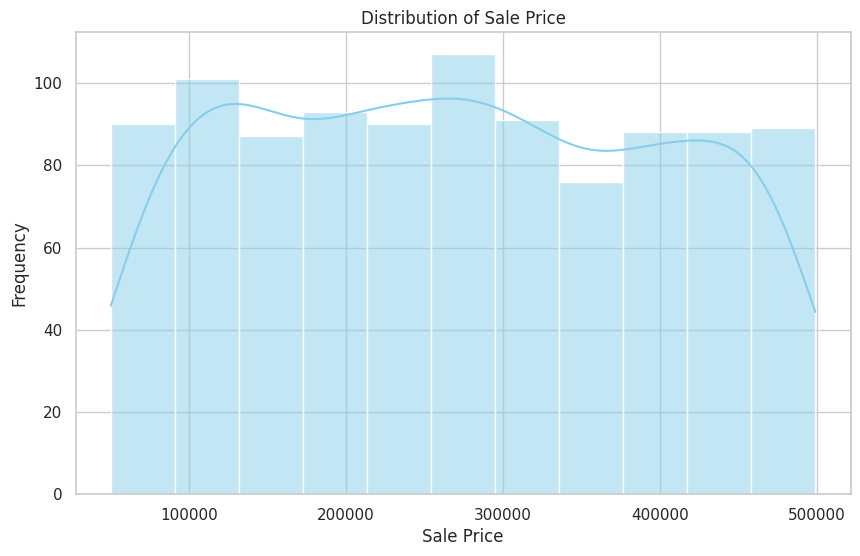

In [30]:
# Distribution of Sale Price

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='SalePrice', kde=True, color='skyblue')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

Observations:
- The distribution exhibits 3 modes
- For a multi-modal distribution, traditional regression models might struggle to capture its complexity
- Exploring ensemble models or advanced regression techniques would be advisable in this scenario







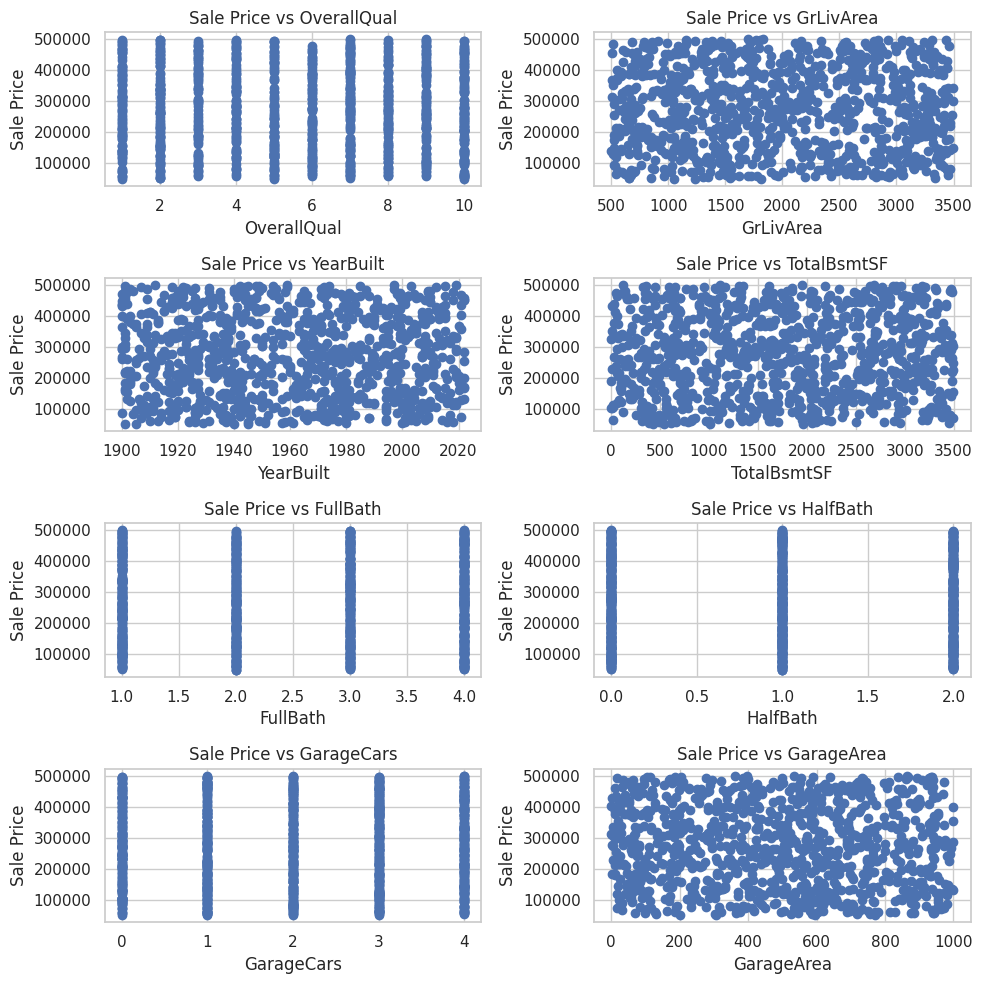

In [35]:
# Bivariate Analysis - Comparing the features with Sale Price

def plot_scatter_chart(data, features):
    num_of_features = len(features)
    num_rows = (num_of_features - 1) // 2 + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=min(2, num_of_features), figsize=(10, 10))

    for i, feature in enumerate(features):
        row_idx = i // 2
        col_idx = i % 2

        if num_rows == 1:
            ax = axes[col_idx]
        else:
            ax = axes[row_idx, col_idx]

        ax.scatter(data[feature], data['SalePrice'], alpha=1)
        ax.set_title(f'Sale Price vs {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Sale Price')

    plt.tight_layout()
    plt.show()


features = ['OverallQual', 'GrLivArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'GarageCars', 'GarageArea']
plot_scatter_chart(data, features)


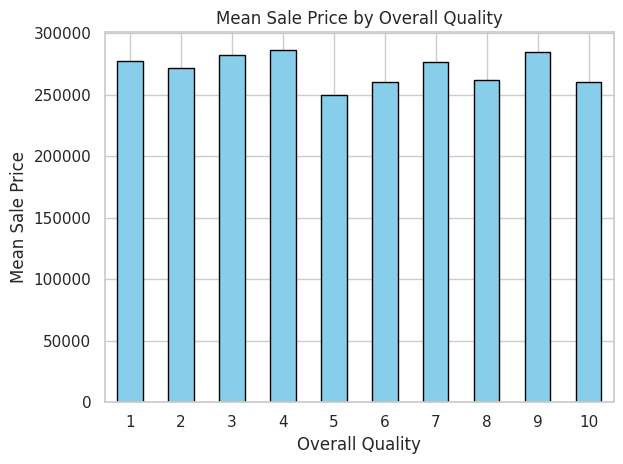

In [36]:
# Grouping data by OverallQual and calculating mean SalePrice

overall_qual_mean_price = data.groupby('OverallQual')['SalePrice'].mean()
overall_qual_mean_price.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Mean Sale Price by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


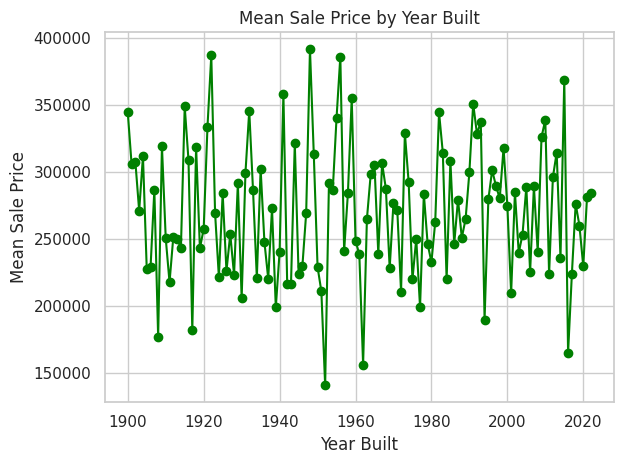

In [37]:
# Grouping data by YearBuilt and calculating mean SalePrice for each year

year_built_mean_price = data.groupby('YearBuilt')['SalePrice'].mean()
year_built_mean_price.plot(kind='line', color='green', marker='o', linestyle='-')
plt.title('Mean Sale Price by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Mean Sale Price')
plt.tight_layout()
plt.show()


Observation:
- The dataset exhibits high variance

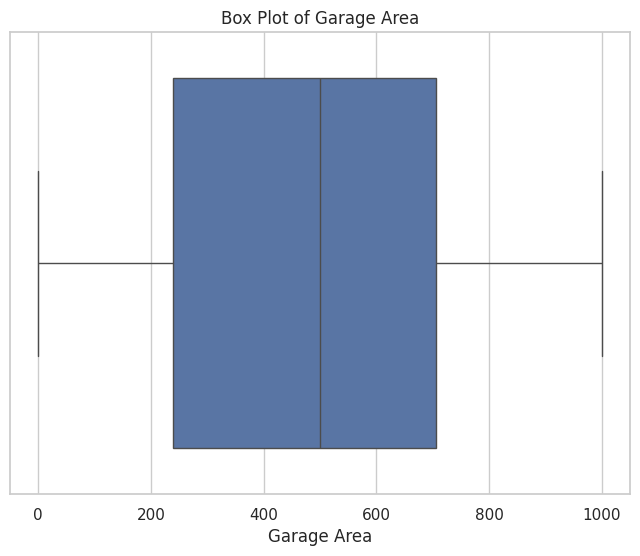

In [38]:
# Visualizing Garage Area Distribution

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['GarageArea'])
plt.title('Box Plot of Garage Area')
plt.xlabel('Garage Area')
plt.show()

Observation:
- The garage area spans from 0 to 1000, lacking any contextual details.
- This column contains erroneous data

In [39]:
# Drop Garage area column
data.drop(columns=["GarageArea"], axis=1, inplace=True)

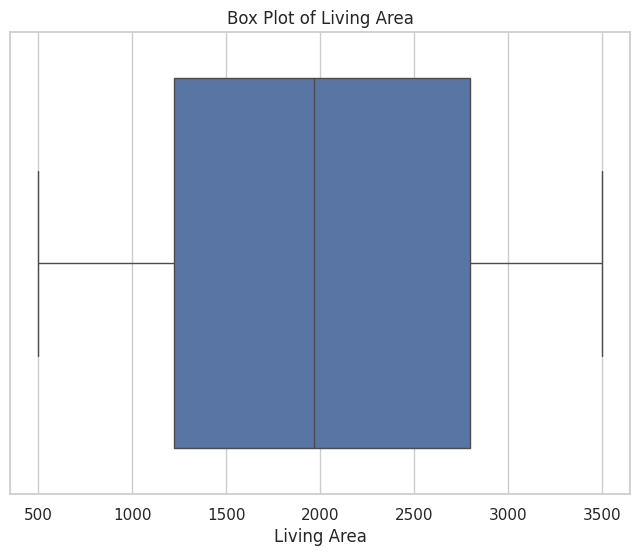

In [40]:
# Visualizing Living Area Distribution
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['GrLivArea'])
plt.title('Box Plot of Living Area')
plt.xlabel('Living Area')
plt.show()

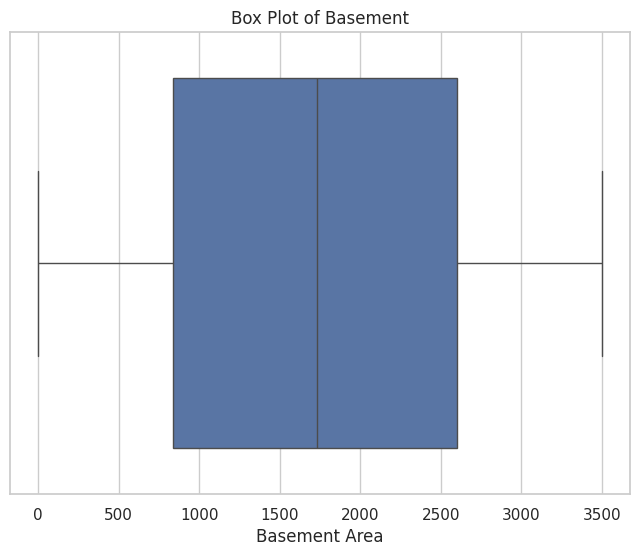

In [41]:
# Visualizing Basement Area Distribution

plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TotalBsmtSF'])
plt.title('Box Plot of Basement')
plt.xlabel('Basement Area')
plt.show()

In [42]:
# Check where basement area is greater than living area

greater_basement_area = (data['TotalBsmtSF'] > data['GrLivArea']).sum()
print("No of house having basement area greater than living area:", greater_basement_area)

No of house having basement area greater than living area: 439


Observations:
- Basement areas span from 0 to 3500, with irregular values such as 1, 2, 6, and 8, indicating potential data quality issues
- Similarly, living areas ranges from 500 to 3500
- Approximately 44% of the houses in the dataset have basement areas exceeding their living areas, a relatively uncommon occurrence.

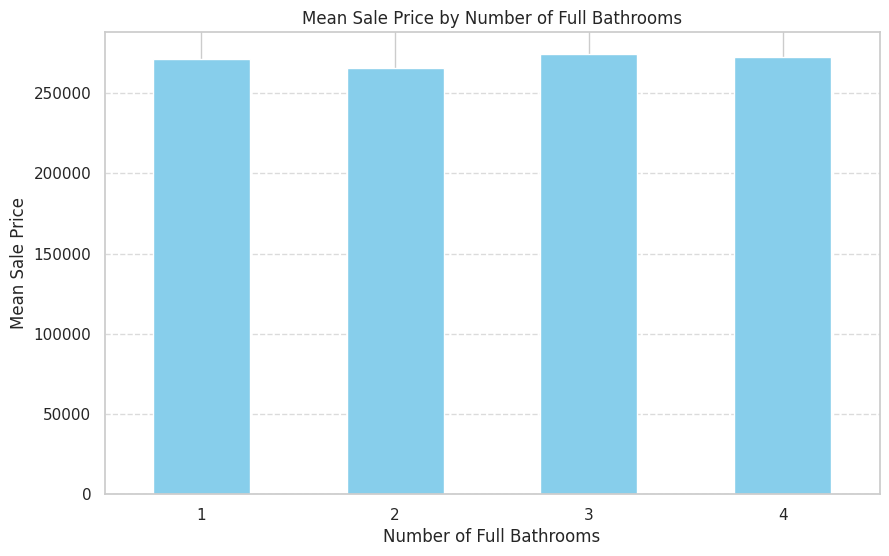

In [43]:
# Visualizing Mean sale price by number of FullBath

mean_sale_price = data.groupby('FullBath')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
mean_sale_price.plot(kind='bar', color='skyblue')
plt.title('Mean Sale Price by Number of Full Bathrooms')
plt.xlabel('Number of Full Bathrooms')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


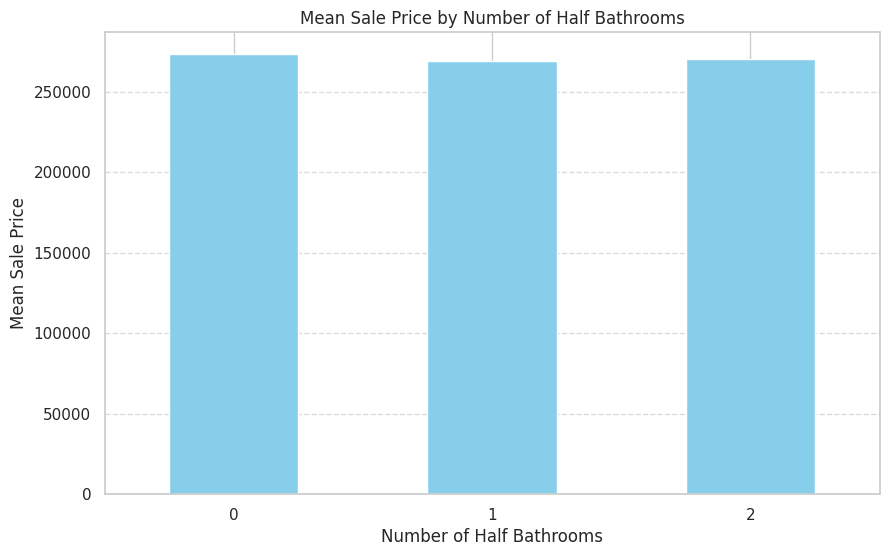

In [44]:
# Visualizing Mean sale price by number of HalfBath

mean_sale_price = data.groupby('HalfBath')['SalePrice'].mean()
plt.figure(figsize=(10, 6))
mean_sale_price.plot(kind='bar', color='skyblue')
plt.title('Mean Sale Price by Number of Half Bathrooms')
plt.xlabel('Number of Half Bathrooms')
plt.ylabel('Mean Sale Price')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


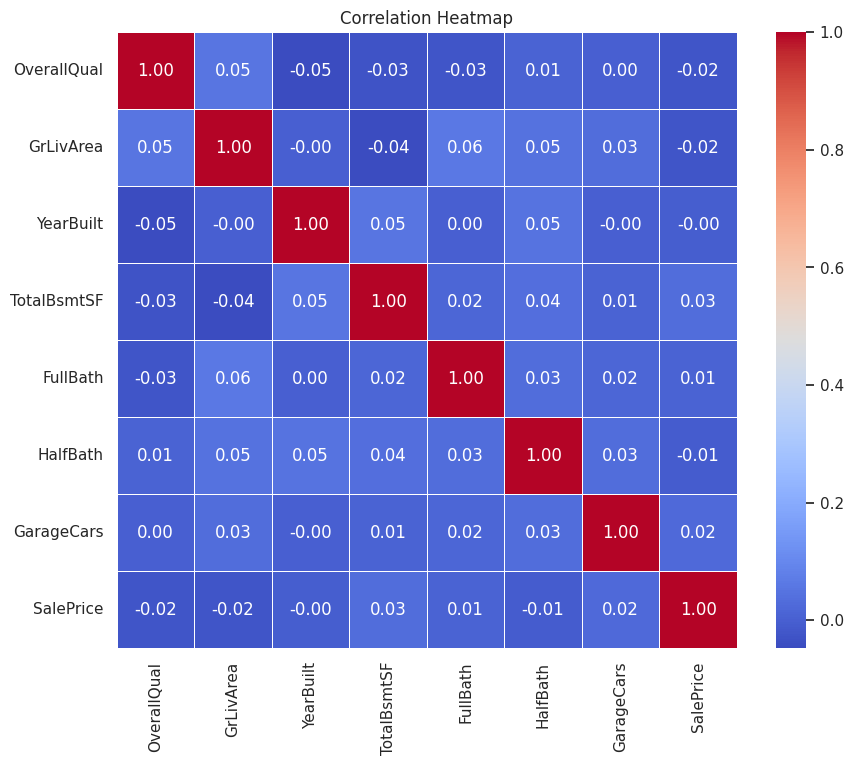

In [45]:
# Visualizing Correlation between the data

correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Observations:
- "TotalBsmtSF" and "GarageArea" have a greater correlation with "SalePrice", although the correlation coefficients are relatively low.
- The correlations are generally weak, suggesting that these features may not be strong predictors of the "SalePrice" individually.
- There are no meaningful pattern in the data

# Model Training

In [46]:
# Splitting data into train test split

X = data.drop(columns=['SalePrice'])
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [47]:
# Define the regression models to identify the most effective one

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

In [48]:
# Cross-validation

cv = KFold(n_splits=10, shuffle=True, random_state=10)
accuracy_results = []

# Normalize the data and train the models
for model in models:

    # Perform cross-validation and calculate accuracy
    accuracy_scores = []

    for train_index, test_index in cv.split(X_train):

        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        model.fit(X_train_fold, y_train_fold)
        accuracy_fold = model.score(X_test_fold, y_test_fold)
        accuracy_scores.append(accuracy_fold)

    mean_accuracy = np.mean(accuracy_scores)
    accuracy_results.append(mean_accuracy)

for i, model in enumerate(models):
    print(f"{model.__class__.__name__} Accuracy: {accuracy_results[i]}")


LinearRegression Accuracy: -0.021187542255327686
Ridge Accuracy: -0.02117256617485911
Lasso Accuracy: -0.021185914418181507
RandomForestRegressor Accuracy: -0.09059168555828227
GradientBoostingRegressor Accuracy: -0.09648841640194741


Observations:
- All the model perform poorly on the dataset and are unable to capture the underlying patterns or relationships between the features and the target variable
- The dataset is highly non-linear and contains complex interactions that these linear models cannot effectively capture
- Ridge Regression slightly outperforms the other models

In [50]:
# Hyperparameter tuning of Ridge

ridge = Ridge()
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 3.0, 5.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Best Parameters: {'alpha': 0.1, 'solver': 'saga'}
Mean Squared Error: 17265146252.180534


In [51]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
mse_results = []

pipeline = make_pipeline(StandardScaler(), best_model)

mse_scores = []
for train_index, test_index in cv.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    pipeline.fit(X_train_fold, y_train_fold)
    y_pred_fold = pipeline.predict(X_test_fold)
    mse_fold = mean_squared_error(y_test_fold, y_pred_fold)
    mse_scores.append(mse_fold)

# Calculate the mean of mean squared errors
mean_mse = np.mean(mse_scores)
print("Mean MSE with best model:", mean_mse)

Mean MSE with best model: 16724243474.525448


# Model Evaluation

In [52]:
# Make predictions
y_pred = best_model.predict(X_test)

In [53]:
# Calculate Mean Absoluate Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 8280583.44447447


In [54]:
# Calculate Mean Square Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 98895124971391.2


In [55]:
# Calculate Root mean square error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 9944602.806115044


In [56]:
# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: -5832.99670744806


Fin!